<a href="https://colab.research.google.com/github/mdfarfan/RNC/blob/main/Red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.7/dist-packages (2.4.3)


# Clonamos el repositorio para obtener el dataset

In [37]:
!git clone https://github.com/joanby/deeplearning-az.git

Cloning into 'deeplearning-az'...
remote: Enumerating objects: 10196, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 10196 (delta 50), reused 67 (delta 30), pack-reused 10096
Receiving objects: 100% (10196/10196), 281.16 MiB | 40.03 MiB/s, done.
Resolving deltas: 100% (75/75), done.
Checking out files: 100% (10119/10119), done.


# Parte 1 - Construir el modelo de CNN

# Importar las librerías y paquetes

In [38]:
# import the necessary packages
import numpy as np
import logging, os
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
from keras.models import Model
from keras.models import load_model
import os
import tensorflow as tf
from tensorflow import keras

#RED 1
Inicializar la CNN

In [39]:
classifier = Sequential()

# Paso 1 - Convolución y Maxpooling

In [40]:
#Capa 1
classifier.add(Conv2D(filters = 64,kernel_size = (3, 3),input_shape = (128,128, 3), activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2,2)))
#Capa 2
classifier.add(Conv2D(filters = 64,kernel_size = (3, 3), activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Paso 3 - Flattening

In [41]:
classifier.add(Flatten())

# Paso 4 - Full Connection

In [42]:
#Capa 1
classifier.add(Dense(units = 256, activation = "relu"))
classifier.add(Dropout(0.5))

#Capa 2
classifier.add(Dense(units = 256, activation = "relu"))
classifier.add(Dropout(0.5))

#Salida
classifier.add(Dense(units = 1, activation = "sigmoid"))


# Compilar la CNN

In [43]:
classifier.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ["accuracy"])
batch = 32

#Filtros capa 1

In [44]:
#Mostrar los filtros
layer = classifier.layers #Obtenemos las capas 
filters,biases = classifier.layers[2].get_weights()
print(layer[2].name,filters.shape)

conv2d_7 (3, 3, 64, 64)


#Mostrar filtros


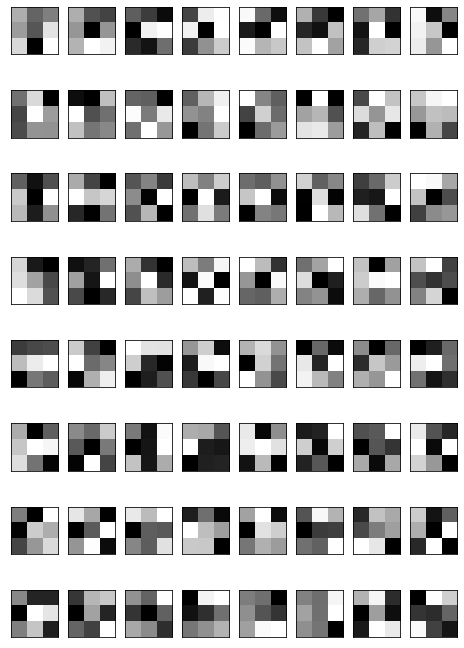

In [45]:
#Creamos la imagen para mostrar
fig1 = plt.figure(figsize=(8,12))
columnas = 8
filas = 8
nfiltros = columnas*filas

#For para graficar todos los filtros
for i in range(1,nfiltros+1):
    f = filters[:,:,:,i-1]
    fig1 = plt.subplot(filas,columnas,i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(f[:,:,0], cmap = 'gray')
    
plt.show()

# Parte 2 - Ajustar la CNN a las imágenes para entrenar 

In [46]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_dataset = train_datagen.flow_from_directory('/content/deeplearning-az/datasets/Part 2 - Convolutional Neural Networks (CNN)/dataset/training_set',
                                                    target_size=(128, 128),
                                                    batch_size=batch,
                                                    class_mode='binary')

testing_dataset = test_datagen.flow_from_directory('/content/deeplearning-az/datasets/Part 2 - Convolutional Neural Networks (CNN)/dataset/test_set',
                                                target_size=(128, 128),
                                                batch_size=32,
                                                class_mode='binary')



Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


#Entrenar la red

In [ ]:
history = classifier.fit(training_dataset,
                        steps_per_epoch=8000/32,
                        epochs=25,
                        validation_data=testing_dataset,
                        validation_steps=2000/32)

Epoch 1/25
250/250 [==============================] - 79s 187ms/step - loss: 0.7232 - accuracy: 0.5321 - val_loss: 0.6765 - val_accuracy: 0.5690
Epoch 2/25
250/250 [==============================] - 47s 186ms/step - loss: 0.6745 - accuracy: 0.5837 - val_loss: 0.6831 - val_accuracy: 0.6050
Epoch 3/25
250/250 [==============================] - 46s 186ms/step - loss: 0.6378 - accuracy: 0.6460 - val_loss: 0.6345 - val_accuracy: 0.6655
Epoch 4/25
250/250 [==============================] - 46s 184ms/step - loss: 0.6186 - accuracy: 0.6706 - val_loss: 0.5898 - val_accuracy: 0.6910
Epoch 5/25
250/250 [==============================] - 46s 184ms/step - loss: 0.5849 - accuracy: 0.6906 - val_loss: 0.5788 - val_accuracy: 0.6955
Epoch 6/25
250/250 [==============================] - 46s 184ms/step - loss: 0.5612 - accuracy: 0.7103 - val_loss: 0.5677 - val_accuracy: 0.7150
Epoch 7/25
250/250 [==============================] - 46s 184ms/step - loss: 0.5509 - accuracy: 0.7241 - val_loss: 0.5435 - val_ac

#Guardar el modelo 


In [ ]:
#Guardamos modelo
!mkdir -p saved_model
classifier.save("model.h5")
classifier.save('/content/RNC/saved_model/RED1') 

INFO:tensorflow:Assets written to: /content/RNC/saved_model/RED1/assets


In [ ]:
RED1 = tf.keras.models.load_model('/content/deeplearning-az/datasets/Part 2 - Convolutional Neural Networks (CNN)/saved_model/RED1')

# Check its architecture
RED1.summary()

In [ ]:
"Mostrar los salidas red 1________________________________________________________________"
#Mostrar las imagenes de salida de las convoluciones
conv_layer = [0,2] #indices de las capas convolucionales
outputs = [classifier.layers[i].output for i in conv_layer] #Guardamos las salidas
model_short = Model(inputs = classifier.inputs, outputs = outputs) #Creamos nuevo modelo
print(model_short.summary()) 

# disable the warnings
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

image_path = "/content/RNC/test_set/cats"

images = []
# make a prediction on the image
images_data = []
filenames = []

# load all images into a list
for img in os.listdir(image_path):
        img = os.path.join(image_path, img)
        img = image.load_img(img, target_size=(128,128))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        # normalize the image
        processed_image = np.array(img, dtype="float") / 255.0
        images.append(processed_image)
        #Hacer predicciones
        pred_result = model_short.predict(images)
        images_data.append(pred_result)
        filenames.append(img)
        
images = np.vstack(images)
feat = pred_result[1]

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________
None


ValueError: ignored


#Construir el modelo de CNN


#RED 2
Inicializar la CNN

In [ ]:
red2 = Sequential()

# Paso 1 - Convolución y Maxpooling

In [ ]:
#Capa 1
red2.add(Conv2D(filters = 32,kernel_size = (3, 3),input_shape = (128,128, 3), activation = "relu"))
red2.add(MaxPooling2D(pool_size = (2,2)))
#Capa 2
red2.add(Conv2D(filters = 64,kernel_size = (3, 3), activation = "relu"))
red2.add(MaxPooling2D(pool_size = (2,2)))
#Capa 3
red2.add(Conv2D(filters = 128,kernel_size = (3, 3),activation = "relu"))
red2.add(MaxPooling2D(pool_size = (2,2)))

# Paso 3 - Flattening

In [ ]:
red2.add(Flatten())

# Paso 4 - Full Connection

In [ ]:
#Capa 1
red2.add(Dense(units = 128, activation = "relu"))
red2.add(Dropout(0.5))

#Capa 2
red2.add(Dense(units = 128, activation = "relu"))
red2.add(Dropout(0.5))

#Salida
red2.add(Dense(units = 1, activation = "sigmoid"))


# Compilar la CNN

In [ ]:
red2.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ["accuracy"])
batch = 32

#Filtros capa 1

In [ ]:
#Mostrar los filtros
layer2 = classifier.layers #Obtenemos las capas 
filters2,biases = classifier.layers[2].get_weights()
print(layer[2].name,filters2.shape)

#Mostrar filtros


In [ ]:
#Creamos la imagen para mostrar
fig1 = plt.figure(figsize=(8,12))
columnas = 8
filas = 8
nfiltros = columnas*filas

#For para graficar todos los filtros
for i in range(1,nfiltros+1):
    f = filters2[:,:,:,i-1]
    fig1 = plt.subplot(filas,columnas,i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(f[:,:,0], cmap = 'gray')
    
plt.show()

# Parte 2 - Ajustar la CNN a las imágenes para entrenar 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_dataset = train_datagen.flow_from_directory('/content/deeplearning-az/datasets/Part 2 - Convolutional Neural Networks (CNN)/dataset/training_set',
                                                    target_size=(128, 128),
                                                    batch_size=batch,
                                                    class_mode='binary')

testing_dataset = test_datagen.flow_from_directory('/content/deeplearning-az/datasets/Part 2 - Convolutional Neural Networks (CNN)/dataset/test_set',
                                                target_size=(128, 128),
                                                batch_size=32,
                                                class_mode='binary')



#Entrenar la red

In [ ]:
history = red2.fit(training_dataset,
                        steps_per_epoch=8000/32,
                        epochs=25,
                        validation_data=testing_dataset,
                        validation_steps=2000/32)

#Guardar el modelo 


In [ ]:
#Cargar los pesos de las neuronas
classifier.load_weights('best_weights.hdf5')
#Guardar modelo
classifier.save('RED2.h5')
print("Saved model to disk")

In [ ]:
"Mostrar los salidas red 2________________________________________________________________"
#Mostrar las imagenes de salida de las convoluciones
conv_layer2 = [0,2] #indices de las capas convolucionales
outputs2 = [red2.layers[i].output for i in conv_layer2] #Guardamos las salidas
print(outputs2)
model_short2 = Model(inputs = red2.inputs, outputs = outputs2) #Creamos nuevo modelo
print(model_short2.summary()) 

# disable the warnings
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

image_path2 = "/test_set/cats"

images2 = []
    
# load all images into a list
for img2 in os.listdir(image_path2):
        img2 = os.path.join(image_path2, img2)
        img2 = image.load_img(img2, target_size=(128,128))
        img2 = image.img_to_array(img2)
        img2 = np.expand_dims(img2, axis=0)
        # normalize the image
        processed_image = np.array(img2, dtype="float") / 255.0
        images2.append(processed_image)
        
images2 = np.vstack(images2)

# make a prediction on the image
images_data2 = []
filenames2 = []


for filename2 in os.listdir(image_path2):    
    pred_result2 = model_short2.predict(images2)
    images_data2.append(pred_result2)
    filenames2.append(filename2)


feat2 = pred_result2[1]

# Sobreentrenada
Predicción del 83.9 en testing y 88.4 en training,
función de perdidas 0.4336 en testing y 0.2768 en training


In [ ]:
print(history.history.keys())

#Perdidas


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Presición


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()